In [1]:
%load_ext lab_black
import warnings
import urllib

warnings.filterwarnings("ignore")
from datetime import datetime
import numpy as np
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data_2019 = pd.read_csv("../data/AB_NYC_2019.csv")
data_2019.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [3]:
# Replacing the missing values for numerical columns with mean for the 2019 data
data_2019["number_of_reviews"] = data_2019["number_of_reviews"].fillna(
    data_2019["number_of_reviews"].mean()
)
data_2019["price"] = data_2019["price"].fillna(data_2019["price"].mean())
data_2019["minimum_nights"] = data_2019["minimum_nights"].fillna(
    data_2019["minimum_nights"].mean()
)
data_2019["reviews_per_month"] = data_2019["reviews_per_month"].fillna(
    data_2019["reviews_per_month"].mean()
)
data_2019["calculated_host_listings_count"] = data_2019[
    "calculated_host_listings_count"
].fillna(data_2019["calculated_host_listings_count"].mean())
data_2019["availability_365"] = data_2019["availability_365"].fillna(
    data_2019["availability_365"].mean()
)
data_2019["last_review"] = data_2019["last_review"].fillna(12 / 18 / 2022)
data_2019["name"] = data_2019["name"].fillna(data_2019["name"].mode()[0])
data_2019["neighbourhood_group"] = data_2019["neighbourhood_group"].fillna(
    data_2019["neighbourhood_group"].mode()[0]
)
data_2019["host_name"] = data_2019["host_name"].fillna(data_2019["host_name"].mode()[0])

data_2019.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [4]:
# Dropping irrelevant columns and those that are unethical to use
data_2019.drop(["id", "host_name", "last_review"], axis=1, inplace=True)

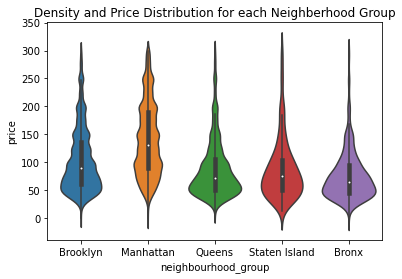

In [5]:
# removing extreme values in the variable 'price' for better visualization results
# filtering for price values less than 300
data2 = data_2019[data_2019.price < 300]
# using violinplot to showcase density and distribtuion of prices
figure_1 = sns.violinplot(data=data2, x="neighbourhood_group", y="price")
figure_1.set_title("Density and Price Distribution for each Neighberhood Group")

figure_1 = figure_1.get_figure()
figure_1.savefig("../artifacts/figure_1.png")

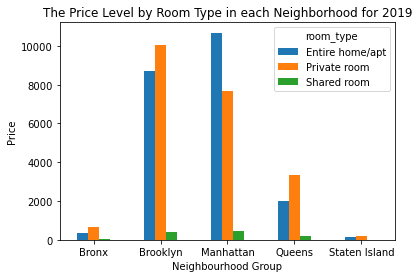

In [6]:
# Barplot for The Price Level by Room Type in each neighborhood
neighborhood_counts = (
    data2.groupby(["neighbourhood_group", "room_type"])["neighbourhood_group"]
    .size()
    .unstack(fill_value=0)
)
room_type = neighborhood_counts.plot.bar(rot=0)
plt.title("The Price Level by Room Type in each Neighborhood for 2019")
plt.ylabel("Price")
plt.xlabel("Neighbourhood Group")

room_type = room_type.get_figure()
room_type.savefig("../artifacts/room_type.png")

In [7]:
# Top 10 neighbourhoods by calculated host listing count

neighborhood_top10 = (
    data2.groupby(["neighbourhood"])["calculated_host_listings_count"]
    .count()
    .to_frame()
    .sort_values(["calculated_host_listings_count"], ascending=[False])
    .head(10)
)
neighborhood_top10

,calculated_host_listings_count
neighbourhood,
Williamsburg,3653
Bedford-Stuyvesant,3616
Harlem,2556
Bushwick,2430
Upper West Side,1721
Hell's Kitchen,1663
East Village,1660
Upper East Side,1629
Crown Heights,1500


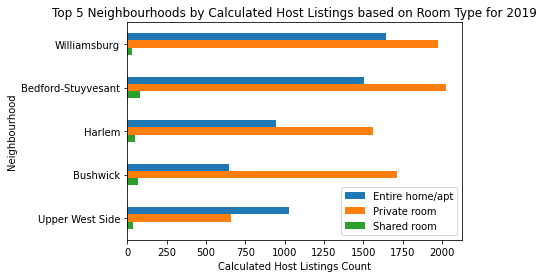

In [8]:
# Top 5 Neighbourhoods by Calculated Host Listings based on Room Type
neighborhood_top5 = neighborhood_top10.head(5)
neighborhood_top5_2 = (
    data2.groupby(["neighbourhood", "room_type"])["room_type"]
    .size()
    .unstack(fill_value=20)
)
neighborhood_top5_count = pd.merge(
    neighborhood_top5, neighborhood_top5_2, how="left", on=["neighbourhood"]
)
neighborhood_top5_count = neighborhood_top5_count[
    ["Entire home/apt", "Private room", "Shared room"]
]
neighborhood = neighborhood_top5_count.plot(kind="barh")
plt.title(
    "Top 5 Neighbourhoods by Calculated Host Listings based on Room Type for 2019"
)
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Neighbourhood")
ax = plt.gca()
ax.invert_yaxis()

neighborhood = neighborhood.get_figure()
neighborhood.savefig("../artifacts/neighborhood.png")

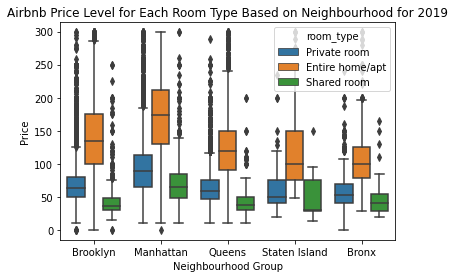

In [9]:
# Boxplot for Airbnb Price Level for Each Room Type Based on Neighbourhood
Boxplot = sns.boxplot(y="price", data=data2, x="neighbourhood_group", hue="room_type")
plt.title("Airbnb Price Level for Each Room Type Based on Neighbourhood for 2019")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

Boxplot = Boxplot.get_figure()
Boxplot.savefig("../artifacts/Boxplot.png")

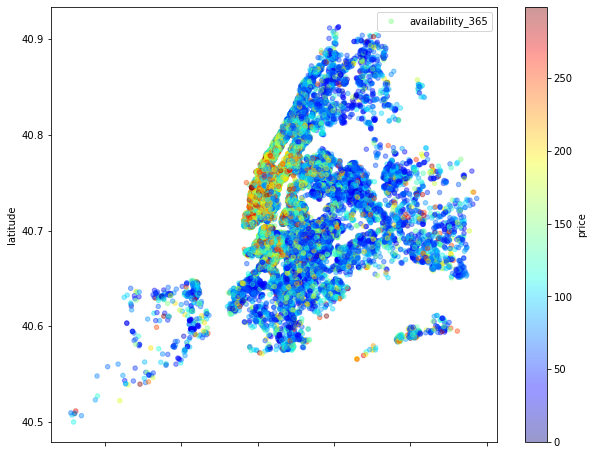

In [10]:
# Creating a heatmap using latitute and longitude
heatmap = data2.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    label="availability_365",
    c="price",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    alpha=0.4,
    figsize=(10, 8),
)
heatmap.legend()

heatmap = heatmap.get_figure()
heatmap.savefig("../artifacts/heatmap.png")

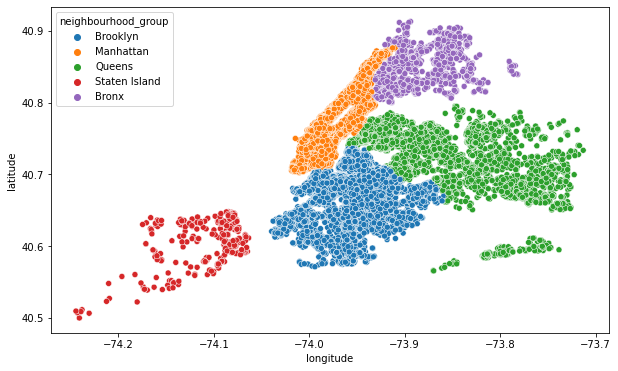

In [11]:
# map by neighbourhood group
heatmap2 = plt.figure(figsize=(10, 6))
sns.scatterplot(data2.longitude, data2.latitude, hue=data2.neighbourhood_group)
plt.ioff()

heatmap2 = heatmap2.get_figure()
heatmap2.savefig("../artifacts/heatmap2.png")

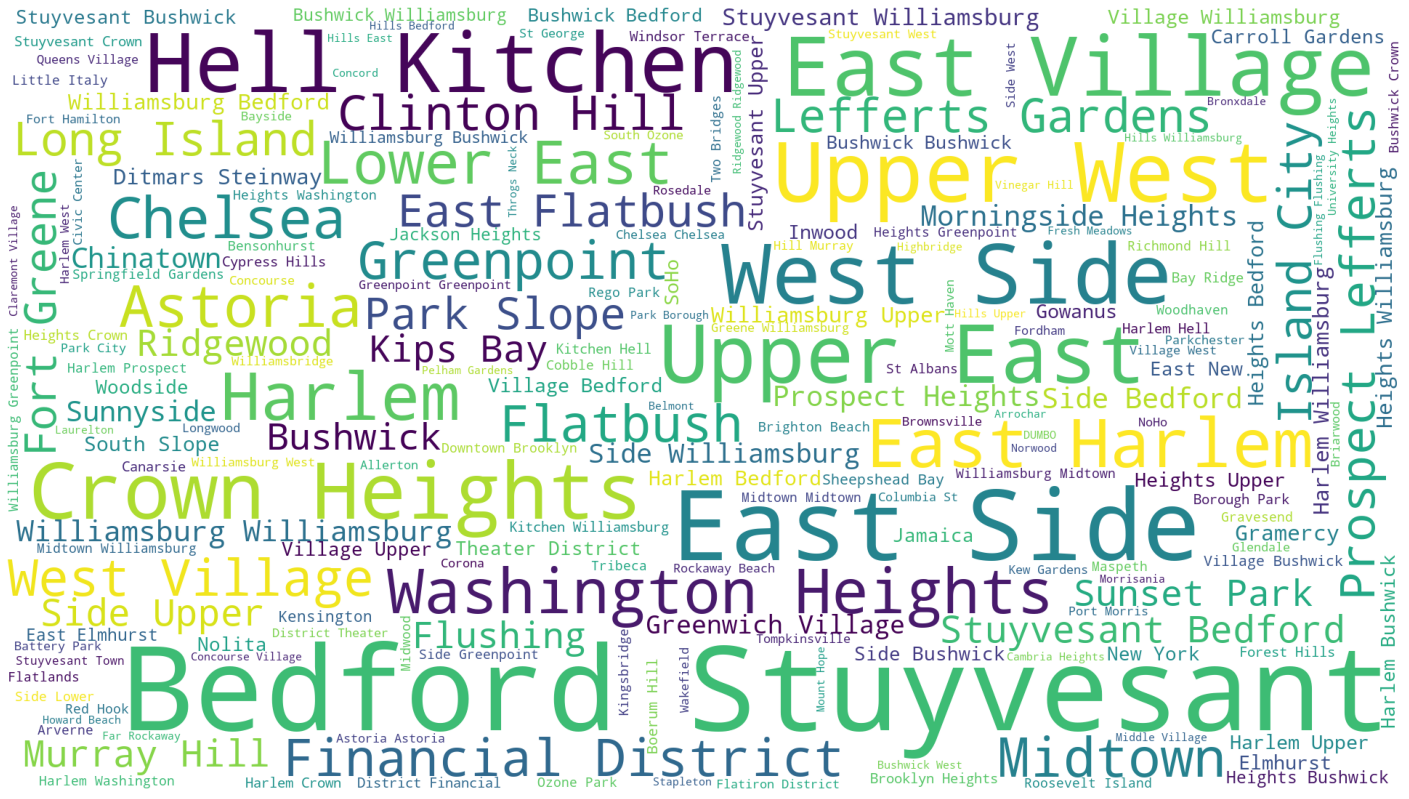

In [13]:
plt.subplots(figsize=(25, 15))
wordcloud = WordCloud(background_color="white", width=1920, height=1080).generate(
    " ".join(data2.neighbourhood)
)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
data2.drop(
    [
        "host_id",
        "latitude",
        "longitude",
        "neighbourhood",
        "number_of_reviews",
        "reviews_per_month",
    ],
    axis=1,
    inplace=True,
)

In [15]:
def Encode(airbnb):
    for column in data2.columns[
        data2.columns.isin(["neighbourhood_group", "room_type"])
    ]:
        data2[column] = data2[column].factorize()[0]
    return data2

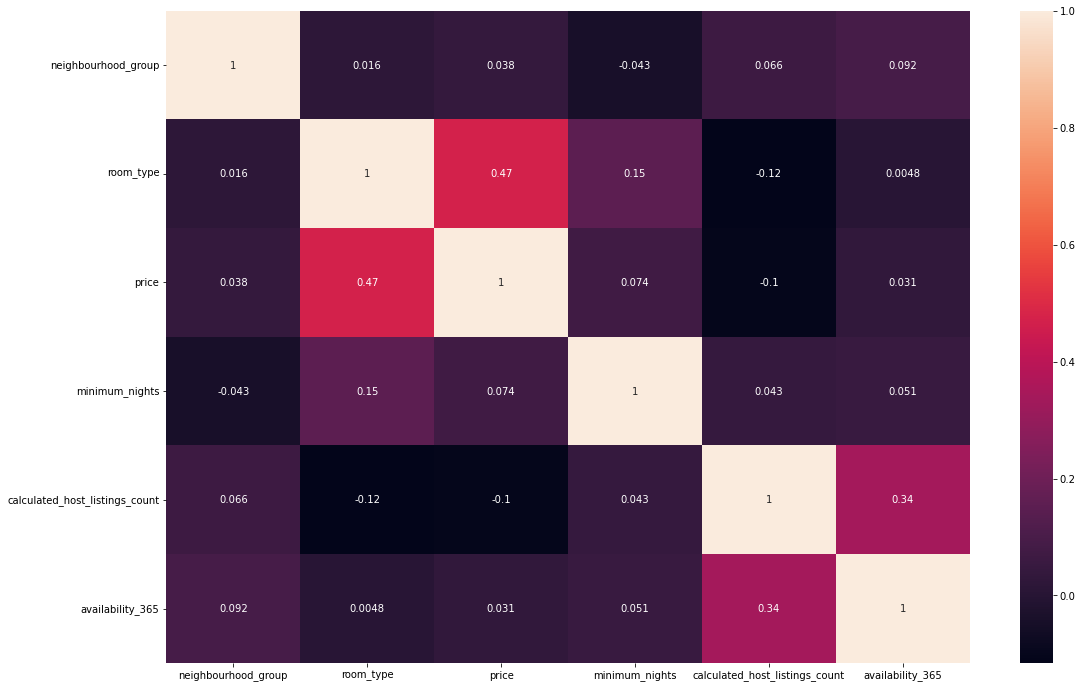

In [16]:
airbnb = Encode(data2.copy())

corr = airbnb.corr(method="kendall")
plt.figure(figsize=(18, 12))
corr_map = sns.heatmap(corr, annot=True)
airbnb.columns

corr_map = corr_map.get_figure()
corr_map.savefig("../artifacts/corr_map.png")